<a href="https://colab.research.google.com/github/MuhammadArshad123/HRK-Computer-Problems/blob/main/HRK_Computer_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<center> Halliday Resnick Krane, Ch.2 Computer Problem
The velocity of an object is given by
$$v_x(t)=e^{-t^2 / 100}(t+10 \sin \pi t) .$$

Both $v_x$ and $x$ are zero when $t=0$. (a) Find first time $v_x = 0$ after the start and find the displacement from the origin ($x$) at that point. 

We are going to use the bisecting method to find the first root of $v_x$. Then we will find displacement by computing $[\int_{0}^{root} v_x \,dt ]$. 

First we must establish bounds, $[a,b]$ where there is only one root to use the Intermediate Value Theorem. Let's the graph the function to establish such bounds.

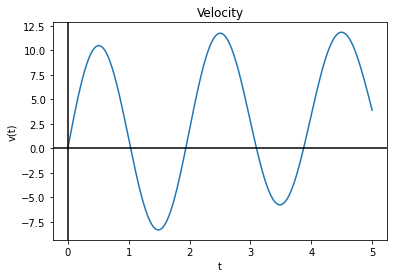

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def velocity(t):
  return np.exp((-(t**2))/100) * (t + 10 * np.sin(np.pi * t))

T = np.linspace(0, 5, 1000) #Returns 1000 evenly spaced numbers from 0 to 5 in a Numpy array.
v = velocity(T) #Calculates the velocity at time t for every value in the array T

# Plot the v(t) values
plt.plot(T, v)

# Add axis and title 
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.xlabel('t')
plt.ylabel('v(t)')
plt.title('Velocity')

# Show the plot
plt.show()

We can see the derivative is somewhere around 1 by graphing, so we can establish bounds $[a,b]$ such that $a=0.8$ and $b=1.2$. Now we can find the exact value using bisecting. Bisecting uses IVT multiple times until it narrows down where the root is. The degree of precision is controlled by tolerance. 

In [2]:
def bisect(f, a, b, tolerance): 
    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)): #They have to be opposite signs otherwise there's no value between them that goes through 0
        raise Exception("A and B do not bound a root")
    m = (a + b)/2 #midpoint
    if np.abs(f(m)) < tolerance: #Is the value at m ([f(m)]) extremely close to 0 [1e-6]? If it is less than, than the number is practically 0, and the root is found.
        return m
      #Root not found, so use recursion to go through the method again with updated bounds
    elif np.sign(f(a)) == np.sign(f(m)):
        return bisect(f, m, b, tolerance) #bound [m,b]
    elif np.sign(f(b)) == np.sign(f(m)):
        return bisect(f, a, m, tolerance) #bound [a,m]

root = bisect(velocity, 0.8, 1.2, 1e-6) #1e-6 is a sufficiently small number.
print(root) #should be near 1.03

1.0329381942749023


So $v_x = 0$ at $t=1.0329$. We must now integrate $v_x$ to find the displacement from $t=0$ to $t=1.0329$, in otherwords
 $[\int_{0}^{1.0329} v_x \,dt ]$. We can accomplish this through the Trapezoidal rule.

In [4]:
#Bounds
a = 0
b = root
n = 100  # Number of points
x = np.linspace(a, b, n) #[100 [n] evenly spaced regions from 0 [a] to 1.0329 [b]]
y = velocity(x) #Finds the v(x) for all points in array X.
h = (b - a) / (n - 1)  # Step size

$I = \frac{h}{2} \left( y_0 + 2 \sum_{i=1}^{n-1} y_i + y_{n-1} \right)$

$I$ is the total area under the curve


$h$ is the step size $(b-a)/(n-1)$ 


$y_0$ and $y_{n-1}$ are the values of the function at the endpoints of the interval


$\sum_{i=1}^{n-1} y_i$ is the sum of the values of the function at the intermediate points [meaning points between the endpoints].

In [5]:
I = h/2 * (y[0] + 2 * np.sum(y[1:n-1]) + y[n-1])
print(I) #Should be around ~6.8

6.860540651967298
